# Python Assignment 4

⏱⏱⏱**Due: 11/30/2025 11:59:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Total points: 150 (equivalent to 15 points after conversion)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `torch`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is always positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


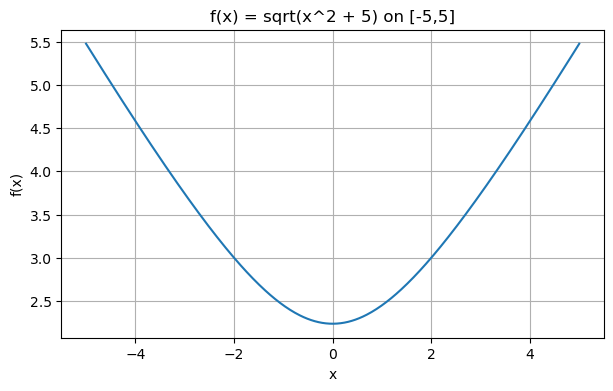

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x).
def f(x):
    return np.sqrt(x**2 + 5)

# Plot the function f(x), np.linspace might be helpful.

xs_plot = np.linspace(-5, 5, 400) #using np.linspace
plt.figure(figsize=(7,4))
plt.plot(xs_plot, f(xs_plot))
plt.title("Gradient Descent to Find Minimum")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()


Initial x0 = 2.0
Final x_T after 50 iterations = 3.885737889953739e-13


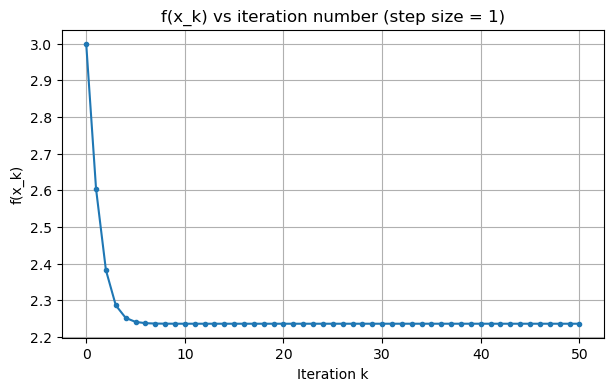

In [ ]:
# Define the derivative of the function f(x), for gradient descent
def grad_f(x):
    #gradient for scalar x
    return x / np.sqrt(x**2 + 5)

# write a function to run the Gradient Descent Algorithm, take input arguments x_0, step_size, and num_iterations; return a list/array of x_k values.

def gradient_descent(x0, step_size, num_iters):
    xs = np.empty(num_iters+1)
    xs[0] = x0
    for k in range(num_iters):
        g = grad_f(xs[k])
        xs[k+1] = xs[k] - step_size * g
    return xs #returns x_k values

# set up/assign initial values

#my SBU ID is 114404255 which ends in "5"

x0 = 5/5 + 1 #use 5 since it's the last digit in my SBU ID
step_size = 1 #alpha = 1
T = 50 #number of iterations

# Run gradient descent by calling the function

xs = gradient_descent(x0, step_size, T)

# report x_T by printing out the value

print("Initial x0 =", x0)
print("Final x_T after 50 iterations =", xs[-1])

# Plot the f(x_k) values vs. iteration number


f_vals = f(xs)
plt.figure(figsize=(7,4))
plt.plot(np.arange(T+1), f_vals, marker='o', markersize=3)
plt.title("f(x_k) vs iteration number (step size = 1)")
plt.xlabel("Iteration k")
plt.ylabel("f(x_k)")
plt.grid(True)
plt.show()


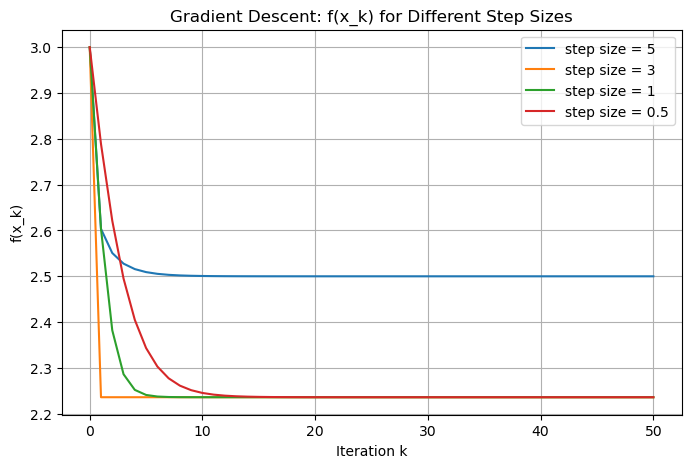

In [ ]:
# create a list containing step sizes

step_sizes = [5, 3, 1, 0.5] #set by the assignment

# initialize a list to store the results from different step sizes

all_results = [] #empty vector

# loop through the step sizes and perform GD and record results

for eta in step_sizes:
    xs_eta = gradient_descent(x0, eta, T)
    all_results.append(xs_eta)

# plot multiple curves in a single graph

plt.figure(figsize=(8,5))
for i, eta in enumerate(step_sizes):
    fk_vals = f(all_results[i]) #compute f(x_k)
    plt.plot(range(T+1), fk_vals, label=f"step size = {eta}")

plt.title("Gradient Descent: f(x_k) for Different Step Sizes")
plt.xlabel("Iteration k")
plt.ylabel("f(x_k)")
plt.grid(True)
plt.legend()
plt.show()

## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



Intercept (bias): 3.702399593410763
Coefficient for x1: 3.755599892584156
Coefficient for x2: 0.9187710749237206


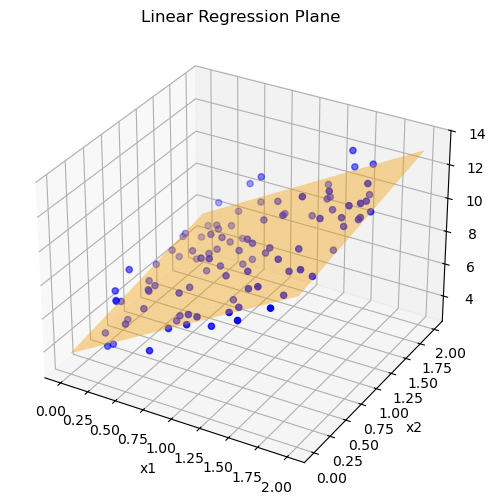

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(55)   # change the seed to be the last two digits of your SB ID.
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

# Add a column of ones to X for the bias terms (intercept) in the normal equation

X_design = np.hstack([np.ones((100, 1)), X])

# Find theta using the normal equation

#normal equation is $\theta = (X^TX)^{-1}X^Ty$
#here X is X_design
theta = np.linalg.inv(X_design.T @ X_design) @ (X_design.T @ y)

# Print the intercept and coefficients of the regression plane

print("Intercept (bias):", theta[0])
print("Coefficient for x1:", theta[1])
print("Coefficient for x2:", theta[2])

# Plot the generated data and the regression plane

#create figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

#original data points
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Data Points')

#create grid
x1_range = np.linspace(0, 2, 30)
x2_range = np.linspace(0, 2, 30)
X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)

#predicted y-values for the plane
Y_grid = theta[0] + theta[1] * X1_grid + theta[2] * X2_grid

#plotting the regression plane
ax.plot_surface(X1_grid, X2_grid, Y_grid, alpha=0.4, color='orange')

#labels
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.set_title("Linear Regression Plane")

plt.show()


## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. Your task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

Final Parameters (theta): [-9.64986808  1.63824894  1.64233707]
Training Accuracy: 96.25%
Testing Accuracy:  95.00%


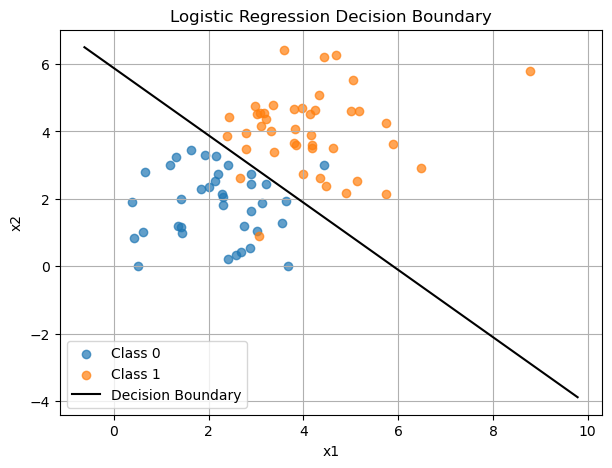

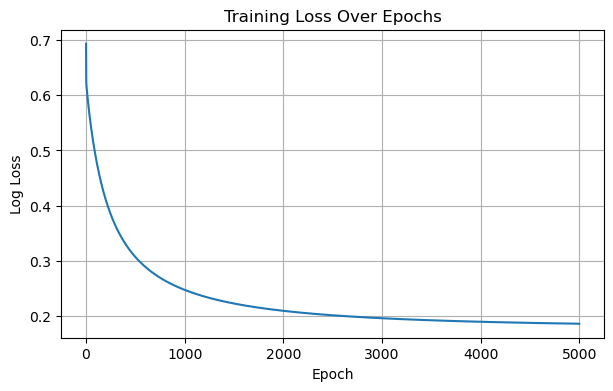

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic function
def sigmoid(z):
    #the logistic function
    return 1 / (1 + np.exp(-z))

# Generate training and testing datasets

#for reproducibility
#using the same seed at part 3
np.random.seed(55)

#two clusters generated
X_class0 = np.random.randn(50, 2) + np.array([2, 2])
X_class1 = np.random.randn(50, 2) + np.array([4, 4])

#combine data
X = np.vstack([X_class0, X_class1])
y = np.array([0]*50 + [1]*50)

#shuffle data
indices = np.random.permutation(len(y))
X = X[indices]
y = y[indices]

#split into train and test data
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]


# Set hyperparameters and initialize parameters

#these were found to run quite well and get a testing accuracy of 95%
learning_rate = 0.1
num_epochs = 5000

#model parameters of weight and bias
theta = np.zeros(3)

#bias term to training inputs
X_train_bias = np.hstack([np.ones((80,1)), X_train])
X_test_bias = np.hstack([np.ones((20,1)), X_test])

# Start training

loss_history = [] #initialize empty vector

for epoch in range(num_epochs):
    #predictions for all training samples
    z = X_train_bias @ theta
    p = sigmoid(z)

    #gradient of logistic loss
    gradient = X_train_bias.T @ (p - y_train) / len(y_train)

    #update parameters
    theta -= learning_rate * gradient

    #store the loss
    loss = -np.mean(y_train*np.log(p+1e-8) + (1-y_train)*np.log(1-p+1e-8))
    loss_history.append(loss)


# Calculate training and testing accuracy

train_preds = sigmoid(X_train_bias @ theta) >= 0.5
test_preds  = sigmoid(X_test_bias  @ theta) >= 0.5

train_acc = np.mean(train_preds == y_train)
test_acc = np.mean(test_preds == y_test)

print("Final Parameters (theta):", theta)
print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy:  {test_acc*100:.2f}%")


# Plot the training dataset and regression decision boundary

plt.figure(figsize=(7,5))

#data points
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label="Class 0", alpha=0.7)
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label="Class 1", alpha=0.7)

#decision boundary
#theta0 + theta1x + theta2y = theta => y = -(theta0 + theta1x) / theta2
x_vals = np.linspace(X_train[:,0].min()-1, X_train[:,0].max()+1, 200)
boundary_y = -(theta[0] + theta[1] * x_vals) / theta[2]

#plot deciison boundary
plt.plot(x_vals, boundary_y, color="black", label="Decision Boundary")

#logistic regression boundary
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()

#plot loss curve
plt.figure(figsize=(7,4))
plt.plot(loss_history)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.grid(True)
plt.show()

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


  Datasets: [train]: train_catvnoncat.h5, [test]: test_catvnoncat.h5